### Import necessary libraries



In [107]:
import sys
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


### Extract data from csv file

In [108]:
# Load the clean data from CSV file
df = pd.read_csv("cleaned_bankruptcy.csv")
df.head(400)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0.481743,0.512702,0.534772,0.600001,0.600001,0.998974,0.797319,0.809246,0.303391,...,0.782129,0.002719,0.624481,0.599996,0.839156,0.277289,0.026478,0.563039,1,0.047357
396,0,0.470238,0.533962,0.522833,0.598286,0.598286,0.998982,0.797385,0.809310,0.303490,...,0.796491,0.004123,0.623464,0.598281,0.840077,0.277855,0.029211,0.568666,1,0.040730
397,0,0.507337,0.552987,0.562182,0.599937,0.599937,0.999022,0.797444,0.809362,0.303508,...,0.807084,0.012759,0.624148,0.599935,0.840887,0.279029,0.026973,0.565900,1,0.032497
398,0,0.526057,0.601068,0.575673,0.609024,0.609089,0.999132,0.797810,0.809665,0.303919,...,0.837170,0.012565,0.623716,0.609020,0.842199,0.275613,0.026802,0.565211,1,0.114083


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

I am working with a dataset that requires a high level of precision in the floating-point values. In this case, using float64 is necessary to ensure that the calculations and analysis performed on the data are accurate. While float32 would require less memory, the trade-off in precision is not worth it for this particular dataset. Therefore, I am using float64 to ensure the necessary level of precision for my analysis.

## data visualisation

In [110]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Due to the large number of columns in our dataset (96), it would be unwieldy to work with all of them. As a solution, we will extract a subset of the most important columns and create a new dataframe containing only the top 10 columns.

Firstly, let's get a feel of the correlations using the heatmap

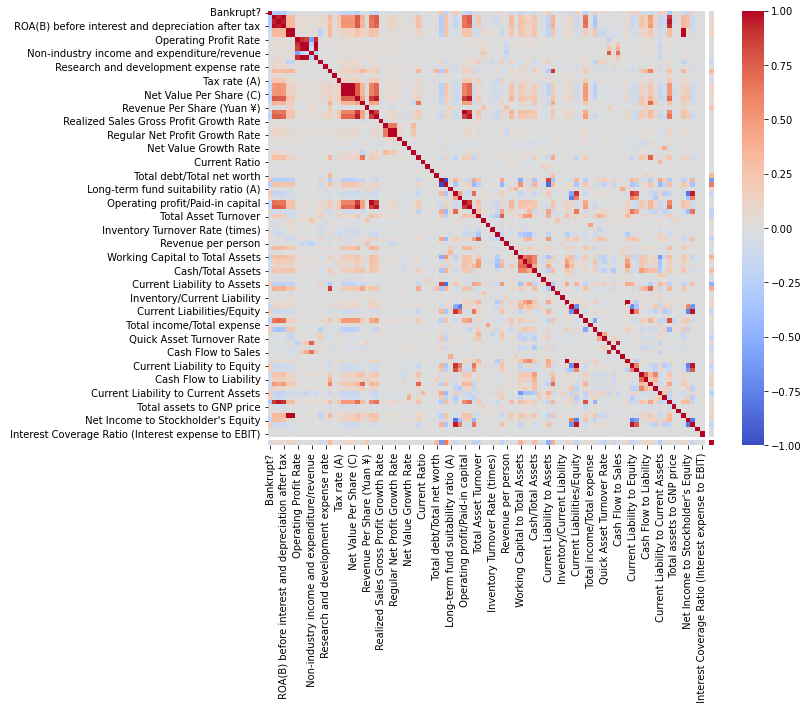

In [111]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show the plot
plt.show()

Since our ultimate goal is to predict bankruptcy, we will extract the top 10 columns that have the highest absolute correlation with the bankruptcy column

In [112]:
# Compute the absolute correlations between the target column and all other columns
target_column = 'Bankrupt?'
abs_correlations = df.corr().abs()[target_column]

# Get the top 10 columns with the highest absolute correlation values
top_10_cols = abs_correlations.sort_values(ascending=False)[1:11].index.tolist()

# Print the names of the top 10 columns
print("Top 10 columns with the highest absolute correlation to the target column:")
print(top_10_cols)


Top 10 columns with the highest absolute correlation to the target column:
[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)']


Now we create a new dataframe consisting of the top correlated features as well as "bankrupt?"

In [113]:
top_10_cols_with_bankrupt = top_10_cols.copy()
# Add the Bankrupt? column to the list of top 10 columns
top_10_cols_with_bankrupt.insert(0, target_column)

### JUST IN CASE!!! Created a new DataFrame that contains only the top 10 columns and the Bankrupt? column
new_df_with_bankrupt = df[top_10_cols_with_bankrupt]

# Create a new DataFrame that contains only the top 10 columns
new_df = df[top_10_cols]

# Print the head of the new DataFrame to verify that it contains the correct columns
new_df_with_bankrupt.head()

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
0,1,0.716845,0.424389,0.405750,0.370594,0.792424,0.207576,0.169141,0.903225,0.137757,0.138736
1,1,0.795297,0.538214,0.516730,0.464291,0.828824,0.171176,0.208944,0.931065,0.168962,0.169918
2,1,0.774670,0.499019,0.472295,0.426071,0.792484,0.207516,0.180581,0.909903,0.148036,0.142803
3,1,0.739555,0.451265,0.457733,0.399844,0.848535,0.151465,0.193722,0.906902,0.147561,0.148603
4,1,0.795016,0.538432,0.522298,0.465022,0.893491,0.106509,0.212537,0.913850,0.167461,0.168412


New heatmap

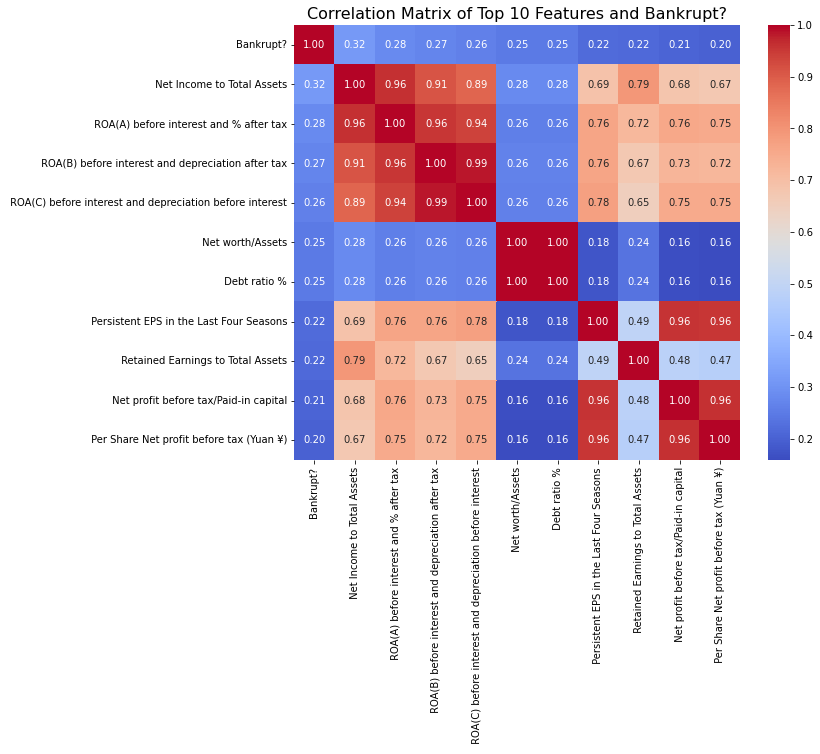

In [114]:
# Create a correlation matrix for the new DataFrame
corr_matrix = new_df_with_bankrupt.corr().abs()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features and Bankrupt?', fontsize=16)
plt.show()

Now we view the distributions of the top 10 featurs

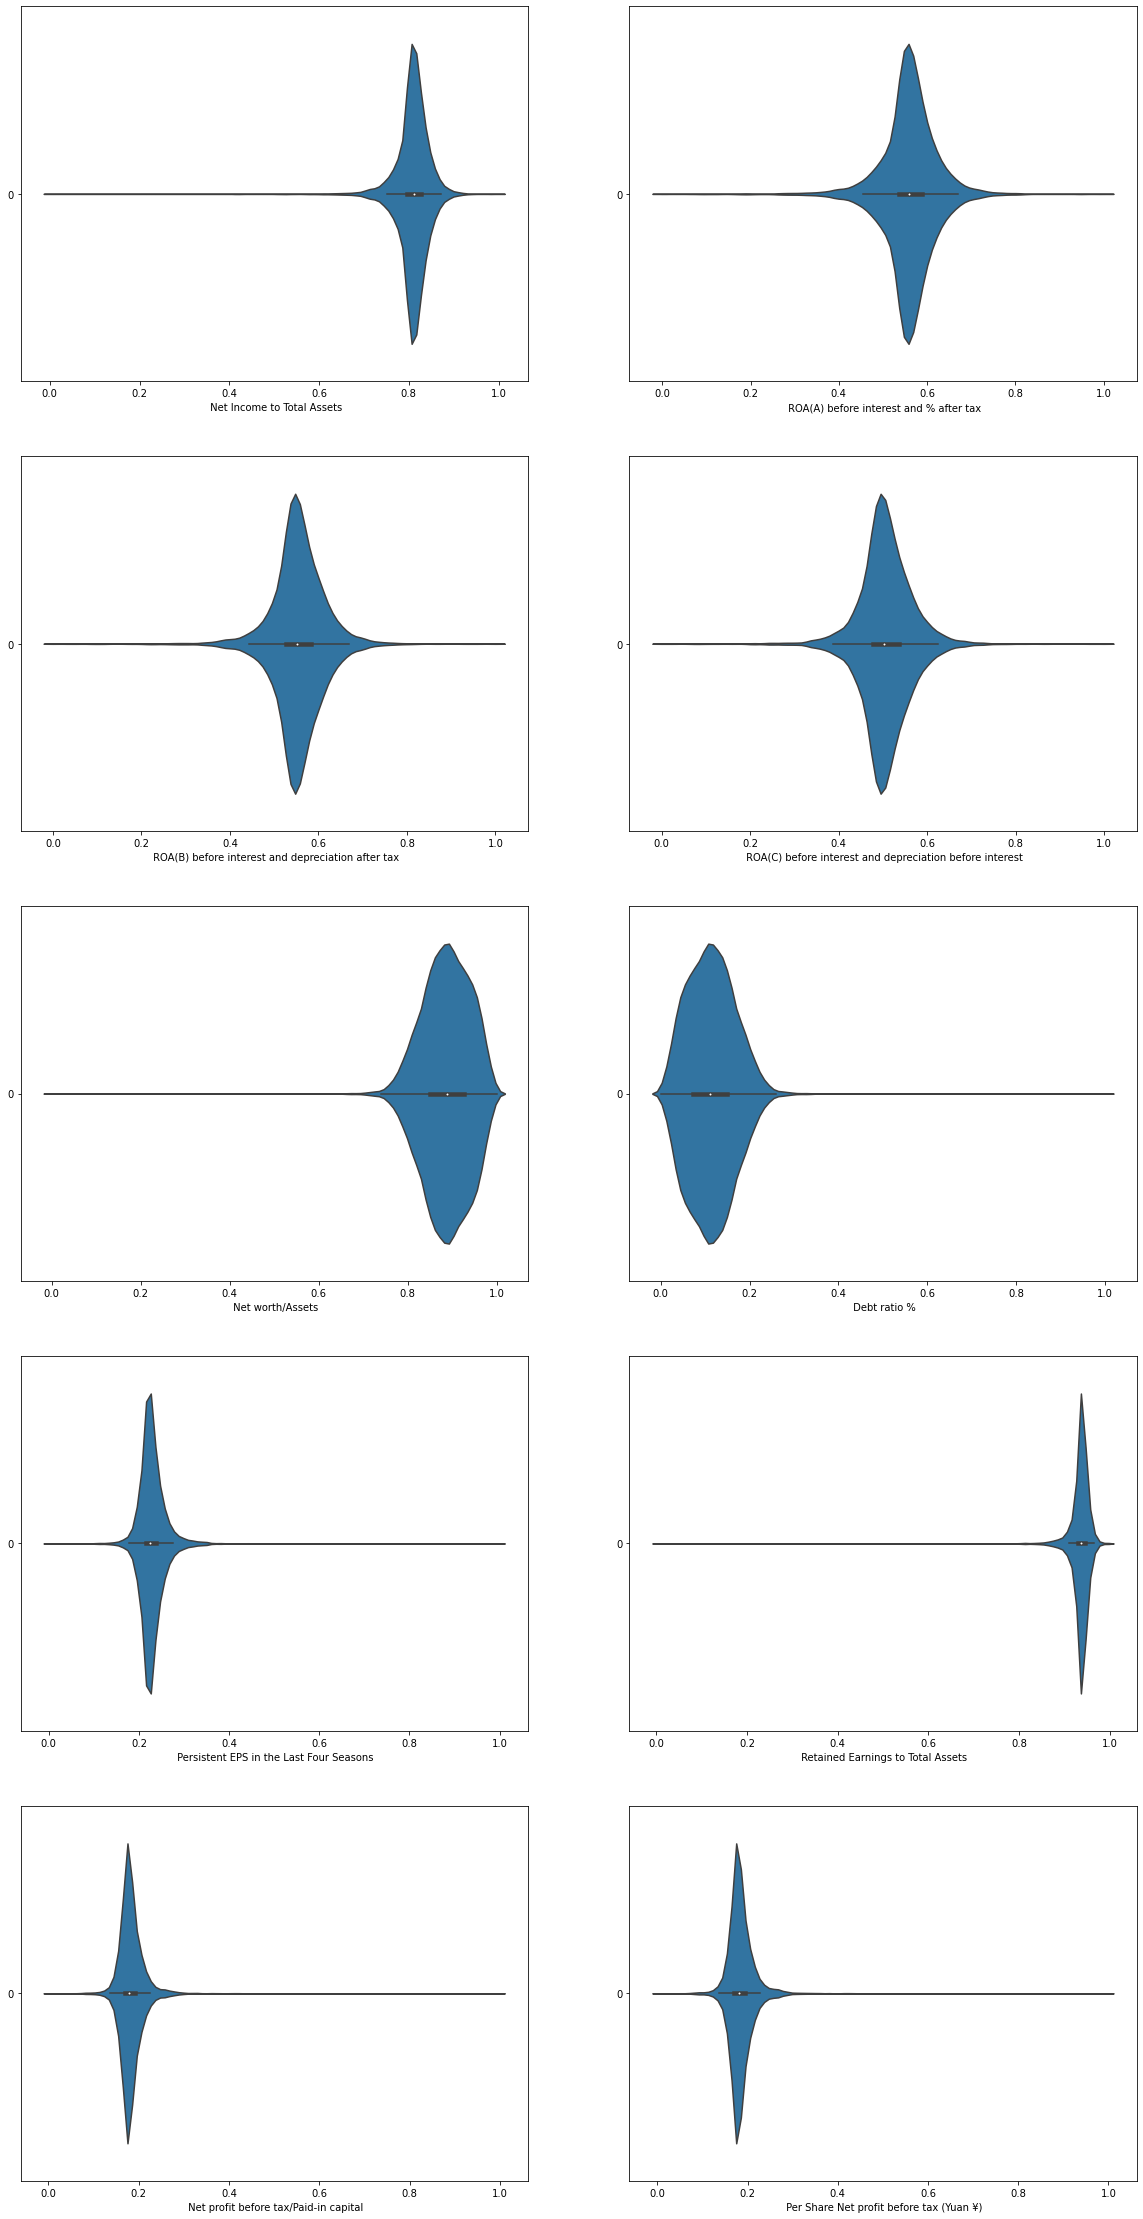

In [115]:
# Draw the distributions of all variables
f, axes = plt.subplots(5,2, figsize=(20, 40))
count = 0

for row in range(5):
    for col in range(2):
        if count == len(new_df.columns):
            break
        sb.violinplot(data=new_df[new_df.columns[count]], orient="h", ax=axes[row, col])
        axes[row, col].set_xlabel(new_df.columns[count], fontsize=10)
        count += 1



plt.show()



As seen from these graphs, most of the numerical values are rather symmetrical.

let's take a closer look a the most correlated feature
Here is the distribution of Retained Earnings to Total Assets alone as it is our most important variable as it is our indicator if the company will go "bankrupt"

In [116]:
new_df[' Retained Earnings to Total Assets'].describe()

count    6819.000000
mean        0.934733
std         0.025564
min         0.000000
25%         0.931097
50%         0.937672
75%         0.944811
max         1.000000
Name:  Retained Earnings to Total Assets, dtype: float64

<AxesSubplot:>

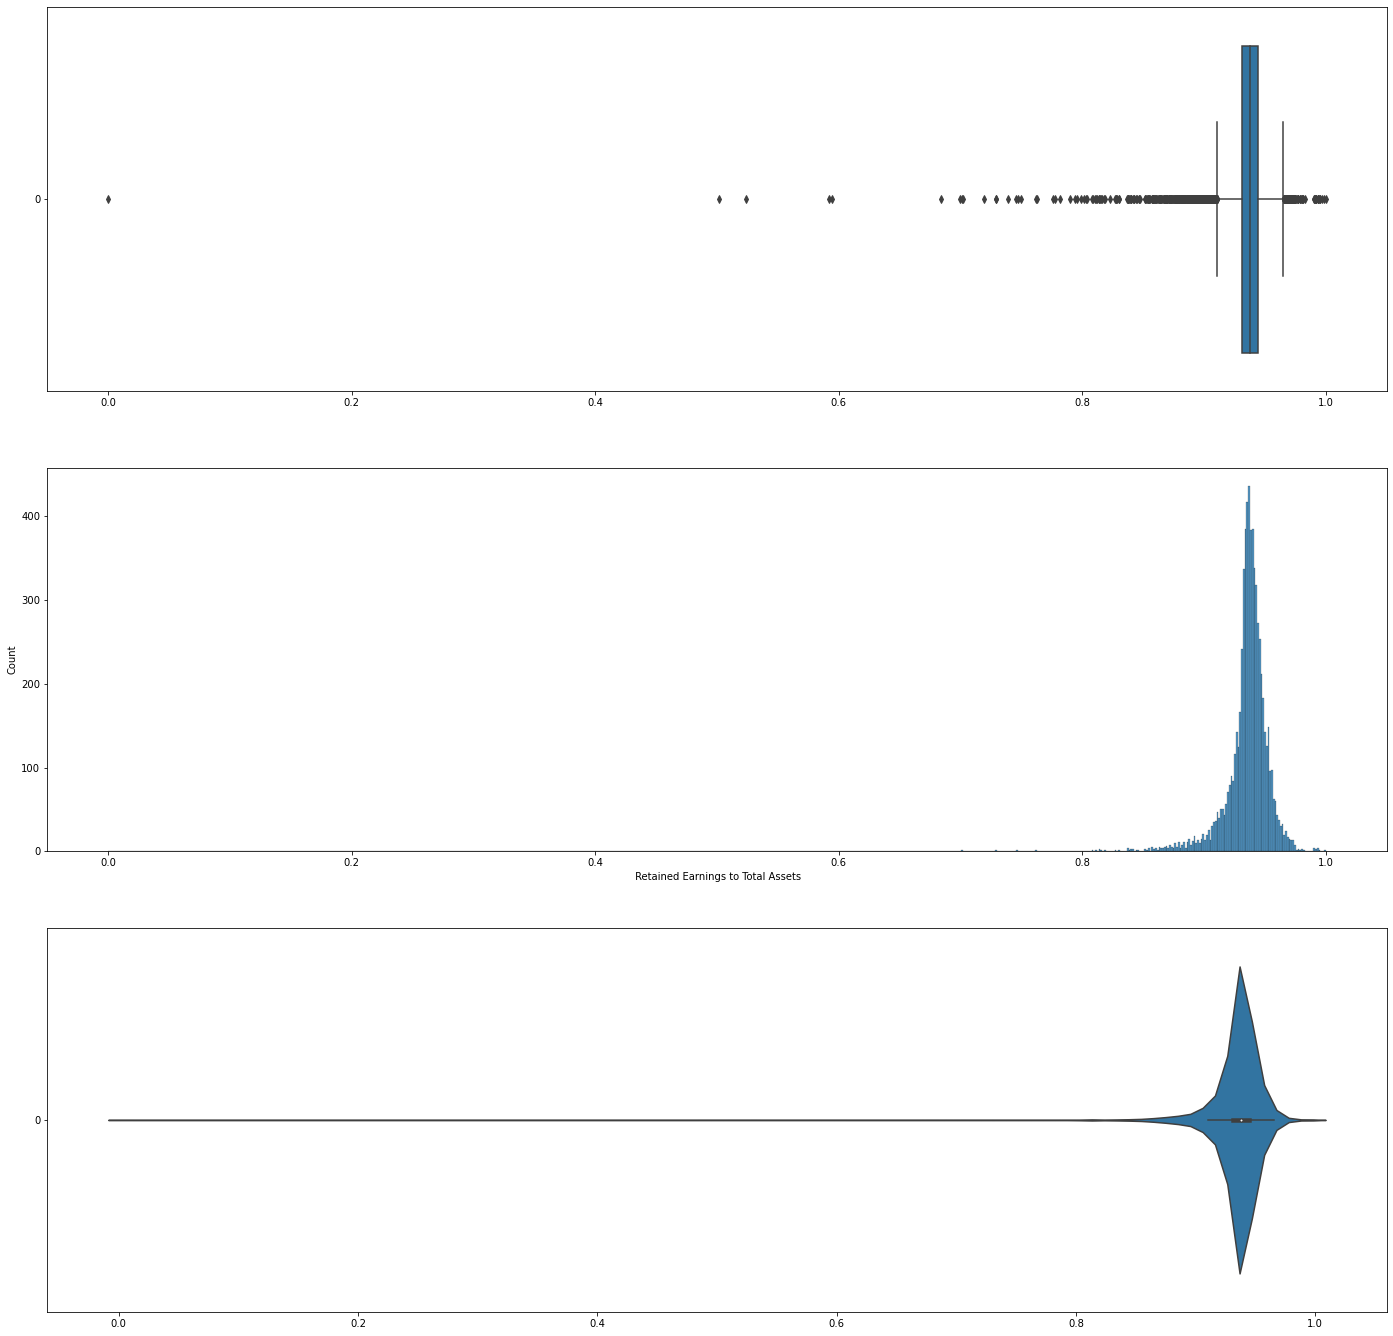

In [117]:
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = new_df[' Retained Earnings to Total Assets'], orient = "h", ax = axes[0])
sb.histplot(data = new_df[' Retained Earnings to Total Assets'],ax = axes[1])
sb.violinplot(data = new_df[' Retained Earnings to Total Assets'], orient = "h", ax = axes[2])

We can see that the some outliers are pretty far away, therefore we will now remove the rows of outliers in the dataframe correspoding to ' Retained Earnings to Total Assets'. 

In [118]:
# Calculate the quartiles and interquartile range for the 'Retained Earnings to Total Assets' column
Q1 = new_df[' Retained Earnings to Total Assets'].quantile(0.25)
Q3 = new_df[' Retained Earnings to Total Assets'].quantile(0.75)
IQR = Q3 - Q1

# Identify the indices of the outliers in the 'Retained Earnings to Total Assets' column
outliers = np.where((new_df[' Retained Earnings to Total Assets'] < (Q1 - 1.5 * IQR)) | (new_df[' Retained Earnings to Total Assets'] > (Q3 + 1.5 * IQR)))

# Remove the rows that contain outliers in the 'Retained Earnings to Total Assets' column
new_df = new_df.drop(new_df.index[outliers])

# Reset the index of the new_df DataFrame
new_df = new_df.reset_index(drop=True)

new_df_no_outliers = new_df.copy()

new_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6186 entries, 0 to 6185
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    Net Income to Total Assets                               6186 non-null   float64
 1    ROA(A) before interest and % after tax                   6186 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6186 non-null   float64
 3    ROA(C) before interest and depreciation before interest  6186 non-null   float64
 4    Net worth/Assets                                         6186 non-null   float64
 5    Debt ratio %                                             6186 non-null   float64
 6    Persistent EPS in the Last Four Seasons                  6186 non-null   float64
 7    Retained Earnings to Total Assets                        6186 non-null   float64
 8    Net profit before

As you can see we have reduced our prepared data from 

RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):

to

RangeIndex: 5981 entries, 0 to 5980
Data columns (total 10 columns):

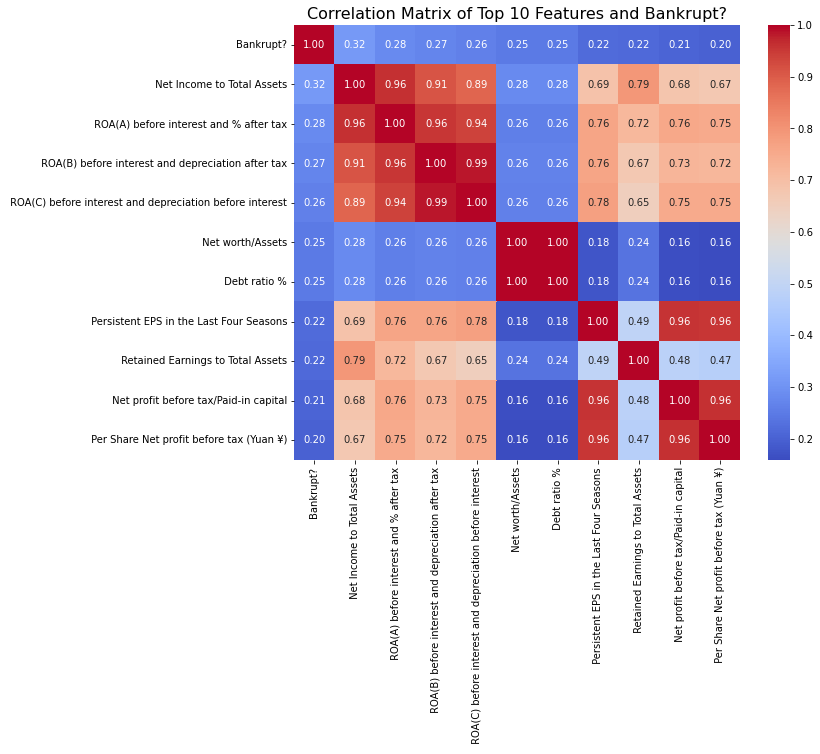

In [119]:
# Create a correlation matrix for the new DataFrame
corr_matrix = new_df_with_bankrupt.corr().abs()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features and Bankrupt?', fontsize=16)
plt.show()

Seeing from the heatmap, the correlation of "Net worth/Assets" and "debt ratio%" between and all the other numerical data have a low correlation, with all of their correlation being below 0.3, with "Net worth/Assets" and "debt ratio%" having the highest at 0.28. This shows that all the variables have a low linear correlation against vote_average. So, they have a poor linear relationship. However, this may mean that they may be non-linear relationship. So, we shall also explore non-linear models.

So, let us look at their various scatterplots,

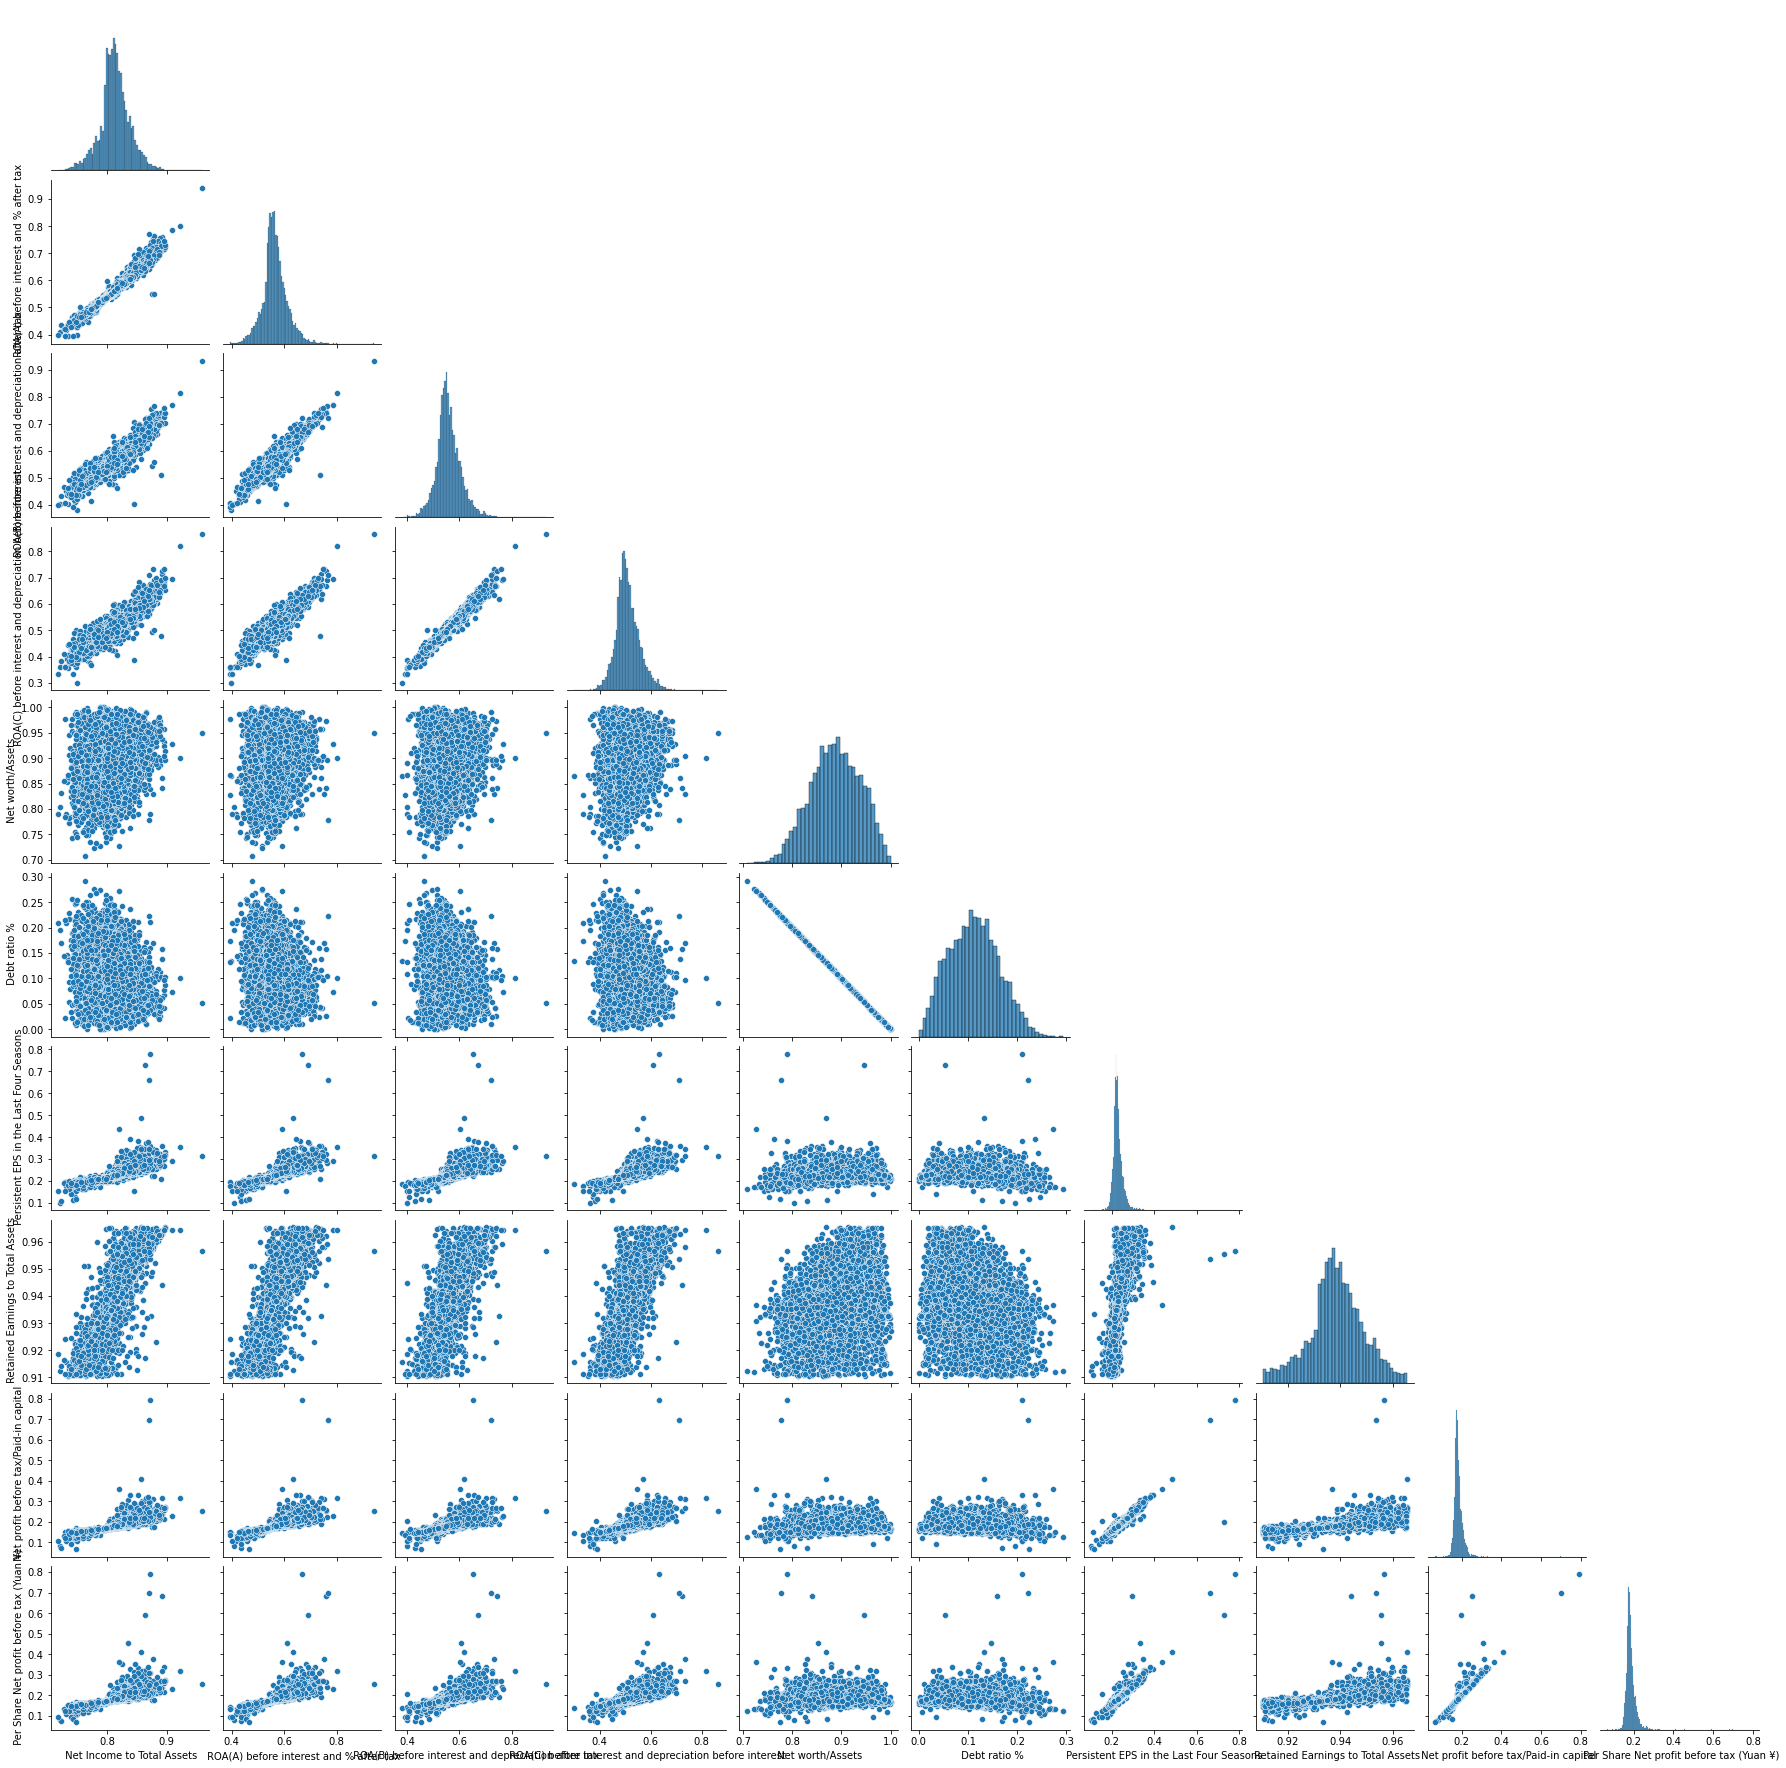

In [120]:
sb.pairplot(data = new_df_no_outliers, corner = True)

Specifically for 'Net worth/Assets' and ' Debt ratio %' against the other numerical variables

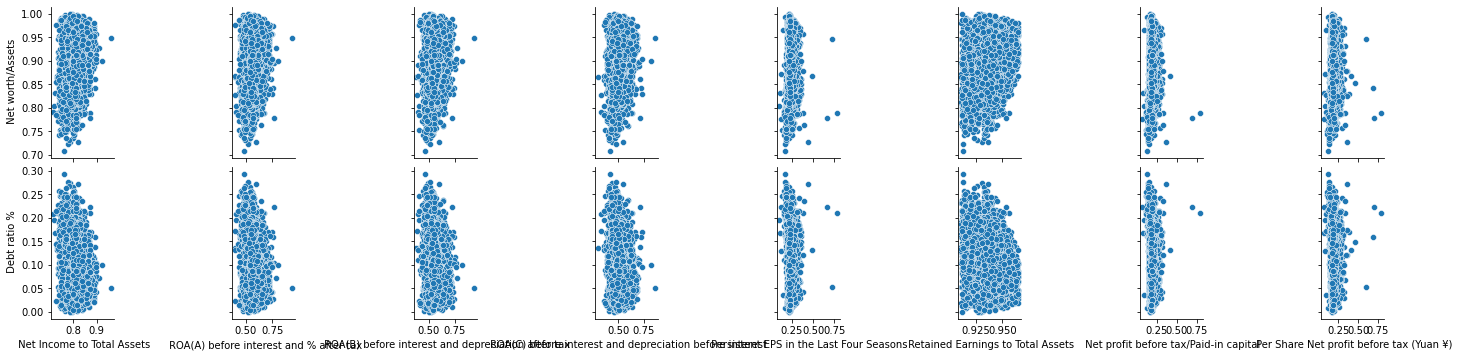

In [121]:
sb.pairplot(data=new_df_no_outliers,
                  y_vars=[' Net worth/Assets',' Debt ratio %'],
                  x_vars=[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)'])

[' Net Income to Total Assets', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Persistent EPS in the Last Four Seasons', ' Retained Earnings to Total Assets', ' Net profit before tax/Paid-in capital', ' Per Share Net profit before tax (Yuan ¥)']